In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import LabelEncoder

In [15]:
#loading dataset and prepocessing
df = pd.read_csv("./bank-full.csv",delimiter=';')
df.dropna()
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
#analysing data based on demographic factors, customer behavior and financial history

In [17]:
# Preprocessing the data
# Convert all data to numerical

job_encoder = LabelEncoder()
job_encoder.fit(df['job'])
df['job'] = job_encoder.fit_transform(df['job'])

marital_encoder = LabelEncoder()
marital_encoder.fit(df['marital'])
df['marital'] = marital_encoder.fit_transform(df['marital'])

edu_encoder = LabelEncoder()
edu_encoder.fit(df['education'])
df['education'] = edu_encoder.fit_transform(df['education'])

default_encoder = LabelEncoder()
default_encoder.fit(df['default'])
df['default'] = default_encoder.fit_transform(df['default'])

housing_encoder = LabelEncoder()
housing_encoder.fit(df['housing'])
df['housing'] = housing_encoder.fit_transform(df['housing'])

loan_encoder = LabelEncoder()
loan_encoder.fit(df['loan'])
df['loan'] = loan_encoder.fit_transform(df['loan'])

contact_encoder = LabelEncoder()
contact_encoder.fit(df['contact'])
df['contact'] = contact_encoder.fit_transform(df['contact'])

month_encoder = LabelEncoder()
month_encoder.fit(df['month'])
df['month'] = month_encoder.fit_transform(df['month'])

pout_encoder = LabelEncoder()
pout_encoder.fit(df['poutcome'])
df['poutcome'] = pout_encoder.fit_transform(df['poutcome'])

y_encoder = LabelEncoder()
y_encoder.fit(df['y'])
df['y'] = y_encoder.fit_transform(df['y'])



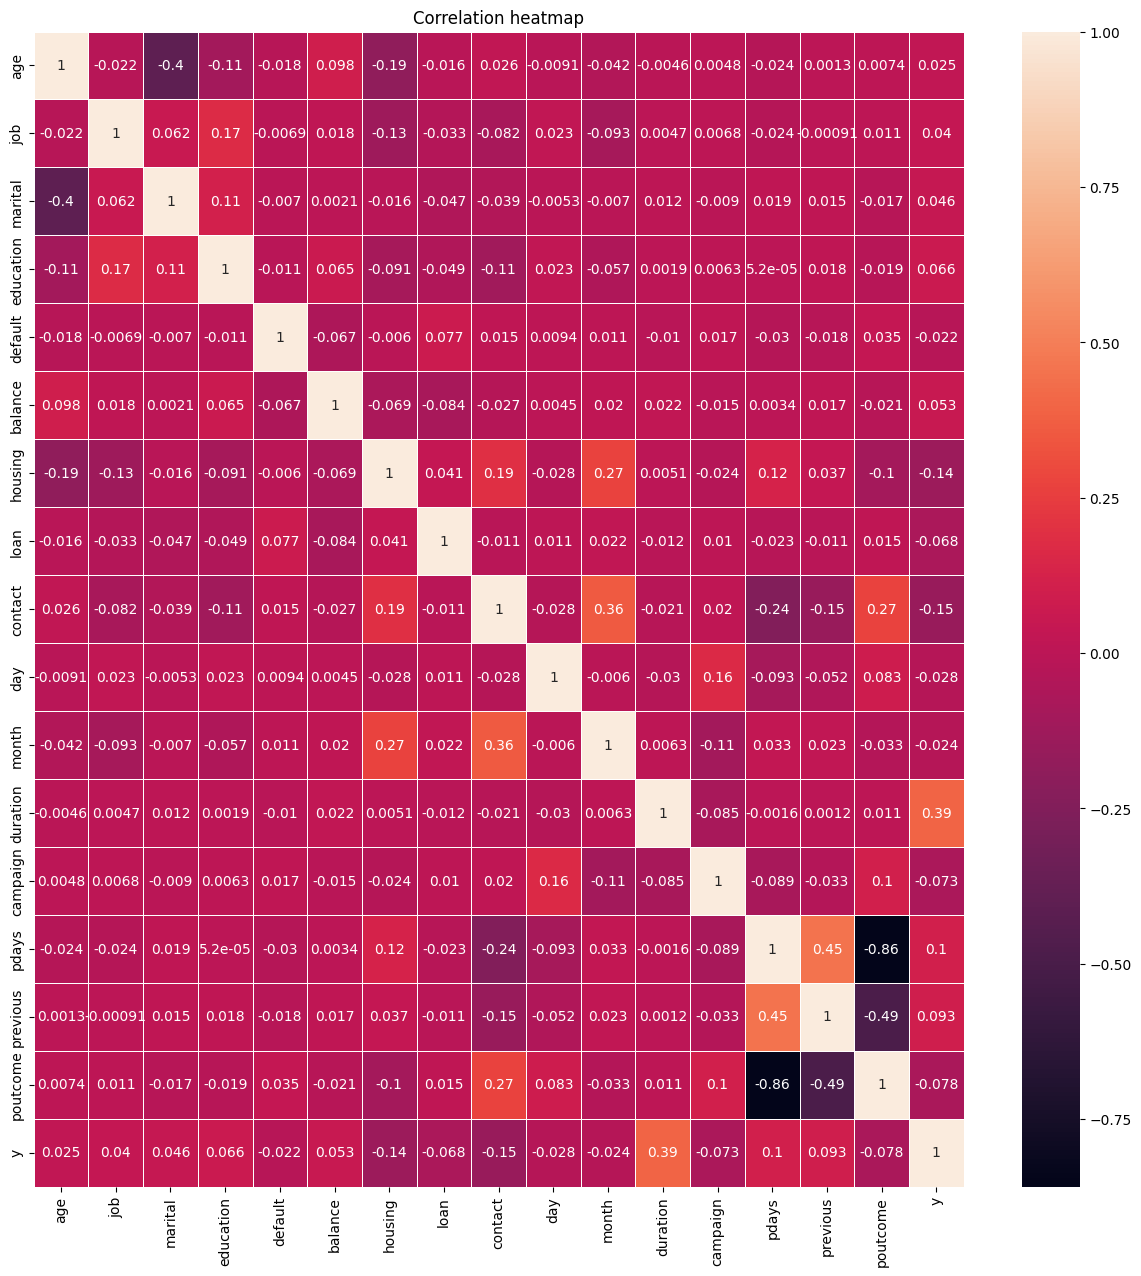

In [18]:
# Correlation matrix heatmap

corr_matrix = df.corr()
plt.figure(figsize=(15,15))
plt.title("Correlation heatmap")
sns.heatmap(data=corr_matrix, annot=True, linewidths=.5)
plt.show()

In [19]:
# Influential columns: age, job, marital, education, balance, duration, pdays, previous

In [20]:
# Create data set and training data set
from sklearn.model_selection import train_test_split
x = df[['age', 'job', 'marital', 'education', 'balance', 'duration', 'pdays', 'previous']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [21]:
# Use at least 3 machine learning models and evaluate them
# Linear Regression
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# Evaluate model
y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(f"Root mean squared error : {rmse}")

Root mean squared error : 0.29113561849102837


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lg_model = LogisticRegression(max_iter=1000, random_state=10)
lg_model.fit(x_train, y_train)

y_pred = lg_model.predict(x_test)

lg_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {lg_accuracy:.4f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8890
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9956
           1       0.62      0.18      0.27      1347

    accuracy                           0.89     11303
   macro avg       0.76      0.58      0.61     11303
weighted avg       0.87      0.89      0.86     11303



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
